In [2]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

app = pd.read_csv(r'C:\Users\Natalia\Downloads\applications.csv',sep=',')
ind = pd.read_csv(r'C:\Users\Natalia\Downloads\industries.csv',sep=',')


print(app,ind)

                Applied at   Amount  Age   Gender  \
0      11.30.2022 10:26:37  12000.0   29  Чоловік   
1      11.30.2022 10:26:39      NaN   36  Чоловік   
2      11.30.2022 10:26:58   7500.0   34  Чоловік   
3      11.30.2022 10:27:31   1500.0   23    Жінка   
4      11.30.2022 10:27:34   8400.0   33    Жінка   
...                    ...      ...  ...      ...   
13310     01.09.2023 11:01  12000.0   25  Чоловік   
13311     01.09.2023 11:14  10500.0   28  Чоловік   
13312     01.09.2023 11:19   5790.0   25  Чоловік   
13313     01.09.2023 11:28  13500.0   31  Чоловік   
13314     01.09.2023 11:38  12600.0   32  Чоловік   

                           Industry Marital status  External Rating  \
0                        Blockchain          Other              8.0   
1      Public services / Government         Single              3.0   
2              Adtech / Advertising         Single              4.0   
3                           Telecom         Single              0.0   
4       

In [3]:
# Formattype 'Applied at' from 'object' to 'datetime64'
app['Applied at']=pd.to_datetime(app['Applied at'], format='mixed')

app.dtypes

Applied at         datetime64[ns]
Amount                    float64
Age                         int64
Gender                     object
Industry                   object
Marital status             object
External Rating           float64
Education level            object
Location                   object
applicant_id               object
dtype: object

In [4]:
#Видаляємo дублікати applicant_id
app.drop_duplicates(subset='applicant_id', keep='first', inplace=False)

#В полі 'External Rating' заповнюємо відсутні значення нулями
app['External Rating'].fillna(0,inplace=True)
#В полі 'Education level' заповнюємо відсутні значення текстом “Середня”
app['Education level'].fillna('Середня', inplace=True)
print(app)

               Applied at   Amount  Age   Gender  \
0     2022-11-30 10:26:37  12000.0   29  Чоловік   
1     2022-11-30 10:26:39      NaN   36  Чоловік   
2     2022-11-30 10:26:58   7500.0   34  Чоловік   
3     2022-11-30 10:27:31   1500.0   23    Жінка   
4     2022-11-30 10:27:34   8400.0   33    Жінка   
...                   ...      ...  ...      ...   
13310 2023-01-09 11:01:00  12000.0   25  Чоловік   
13311 2023-01-09 11:14:00  10500.0   28  Чоловік   
13312 2023-01-09 11:19:00   5790.0   25  Чоловік   
13313 2023-01-09 11:28:00  13500.0   31  Чоловік   
13314 2023-01-09 11:38:00  12600.0   32  Чоловік   

                           Industry Marital status  External Rating  \
0                        Blockchain          Other              8.0   
1      Public services / Government         Single              3.0   
2              Adtech / Advertising         Single              4.0   
3                           Telecom         Single              0.0   
4                   

In [5]:
#Додаємо рейтинги індустрій з файлу industries.csv
merged=pd.merge(app, ind, on='Industry', how='outer')

print(merged)

               Applied at   Amount  Age   Gender    Industry Marital status  \
0     2022-11-30 10:26:37  12000.0   29  Чоловік  Blockchain          Other   
1     2022-11-30 10:30:00      NaN   22  Чоловік  Blockchain         Single   
2     2022-11-30 10:31:29  12000.0   29  Чоловік  Blockchain          Other   
3     2022-11-30 10:36:59  30000.0   29  Чоловік  Blockchain         Single   
4     2022-11-30 10:44:28  16050.0   50  Чоловік  Blockchain          Other   
...                   ...      ...  ...      ...         ...            ...   
13310 2022-12-04 12:53:00  14403.0   34  Чоловік    Robotics        Married   
13311 2022-12-05 16:32:00   6000.0   30  Чоловік    Robotics        Married   
13312 2022-12-07 16:24:00    900.0   18  Чоловік    Robotics          Other   
13313 2022-12-14 11:13:46   3900.0   27    Жінка    Robotics         Single   
13314 2022-12-26 09:09:22   2550.0   20  Чоловік    Robotics        Married   

       External Rating                       Educat

In [6]:
merged['rating']=0

#Якщо вік заявщика між 35 та 55, до рейтингу додається 20 балів
merged.loc[(merged['Age']>=35) & (merged['Age']<=55),'rating']+=20

#Якщо заявка була подана не у вихідні, до рейтингу додається 20 балів
merged.loc[(merged['Applied at'].dt.dayofweek<5),'rating']+=20

#Якщо заявщик одружений, до рейтингу додається 20 балів
merged.loc[merged['Marital status']=='Married','rating']+=20

#Якщо заявщик знаходиться в Києві чи області, до рейтингу додається 10 балів
merged.loc[merged['Location']=='Київ чи область','rating']+=10

#Значення 'Score' з таблиці industries.csv також додається до заявки (і складає від 0 до 20 балів)
merged['rating']+=merged['Score']

#Якщо 'External Rating' більше чи дорівнює 7, до рейтингу додається 20 балів
merged.loc[merged['External Rating']>=7,'rating']+=20

#Якщо 'External Rating' менше чи дорівнює 2, з рейтингу віднімається 20 балів
merged.loc[merged['External Rating']<=2,'rating']-=20

print(merged)

               Applied at   Amount  Age   Gender    Industry Marital status  \
0     2022-11-30 10:26:37  12000.0   29  Чоловік  Blockchain          Other   
1     2022-11-30 10:30:00      NaN   22  Чоловік  Blockchain         Single   
2     2022-11-30 10:31:29  12000.0   29  Чоловік  Blockchain          Other   
3     2022-11-30 10:36:59  30000.0   29  Чоловік  Blockchain         Single   
4     2022-11-30 10:44:28  16050.0   50  Чоловік  Blockchain          Other   
...                   ...      ...  ...      ...         ...            ...   
13310 2022-12-04 12:53:00  14403.0   34  Чоловік    Robotics        Married   
13311 2022-12-05 16:32:00   6000.0   30  Чоловік    Robotics        Married   
13312 2022-12-07 16:24:00    900.0   18  Чоловік    Robotics          Other   
13313 2022-12-14 11:13:46   3900.0   27    Жінка    Robotics         Single   
13314 2022-12-26 09:09:22   2550.0   20  Чоловік    Robotics        Married   

       External Rating                       Educat

In [7]:
#Рейтинг дорівнює нулю, якщо відсутнє значення 'Amount' або якщо 'External Rating' дорівнює нулю.
merged.loc[(merged['External Rating']==0) | (np.isnan(merged['Amount'])),'rating']=0

#Якщо значення 'rating'>100, замінюємо значення 'rating' на 100
merged.loc[merged['rating']>100,'rating']=100

In [8]:
#Видаляємо заявки з рейтингом менше або дорівнює 0
new=merged.drop(merged[merged['rating']<=0].index)


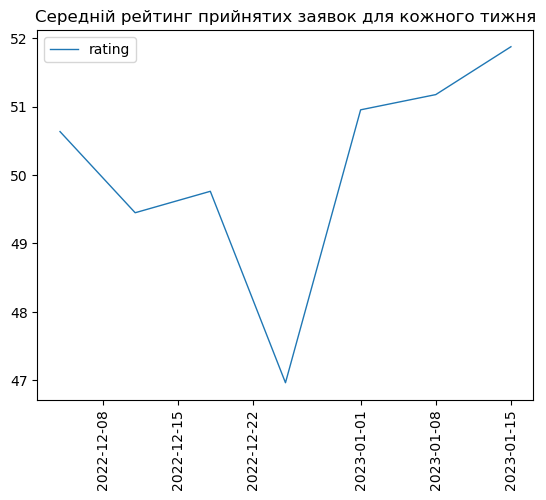

In [9]:
#Групуємо за тижнем подачі заявки, будуємо графік середнього рейтингу прийнятих заявок для кожного тижня
plt.plot((new.groupby(pd.Grouper(key='Applied at', freq='W'))['rating'].mean()), linewidth=1, label='rating')
plt.title('Середній рейтинг прийнятих заявок за тиждень')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [11]:
#Вигружаємо отриману БД в excel
new['Applied at'] = new['Applied at'].dt.tz_localize(None)
new.to_excel('hw_6.xlsx')